In [17]:
!pip install wooldridge

In [18]:
import wooldridge
from wooldridge import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [19]:
df = pd.DataFrame(wooldridge.data('wage1'))
df.dropna()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


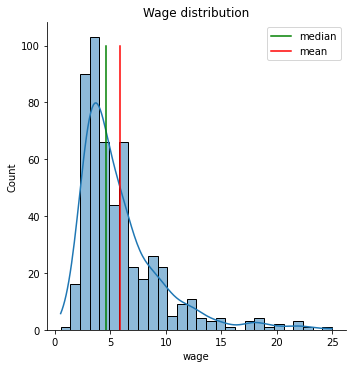

In [20]:
wage_median = df.wage.median()
wage_mean = df.wage.mean()
sns.displot(x='wage', data=df, kde=True)
plt.plot([wage_median, wage_median], [0, 100], color='green', label='median')
plt.plot([wage_mean, wage_mean], [0, 100], color='red', label='mean')
plt.title('Wage distribution')
plt.legend()
plt.show()

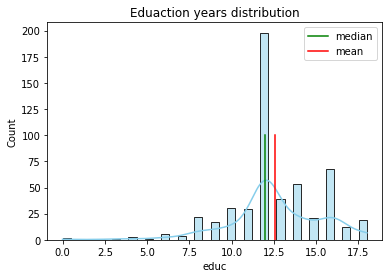

In [21]:
education_median = df.educ.median()
education_mean = df.educ.mean()
sns.histplot(data=df, x="educ", color="skyblue", kde=True)
plt.plot([education_median, education_median], [0, 100], color='green', label='median')
plt.plot([education_mean, education_mean], [0, 100], color='red', label='mean')
plt.title('Eduaction years distribution')
plt.legend()
plt.show()

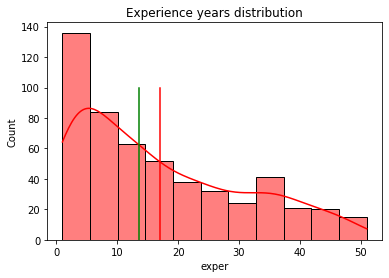

In [22]:
experience_median = df.exper.median()
experience_mean = df.exper.mean()
sns.histplot(data=df, x="exper", color="red", label="Experience years", kde=True)
plt.plot([experience_median, experience_median], [0, 100], color='green', label='median')
plt.plot([experience_mean, experience_mean], [0, 100], color='red', label='mean')
plt.title('Experience years distribution')
plt.show()

In [23]:
class linear_reg:
    
    def __init__(self, X, Y, A):
        self.X = X
        self.Y = Y
        self.betas = [0, 0.7]
        self.learning_rate = A
  
    def update_coeffs(self):
        Y_pred = self.predict()
        Y = self.Y

        temp_0 = self.betas[0] - (self.learning_rate * ((1/len(Y)) *
                    np.sum(Y_pred - Y)))

        temp_1 = self.betas[1] - (self.learning_rate * ((1/len(Y)) *
                    np.sum((Y_pred - Y) * self.X)))

        self.betas[0] = temp_0
        self.betas[1] = temp_1


    def get_cost_func(self):
        Y_pred = self.predict()
        cost_func = (1 / 2*len(self.Y)) * (np.sum(Y_pred - self.Y)**2)
        return cost_func
    
    def predict(self):
        Y_pred = list()
        for dep_var in self.X:
            Y_pred.append(self.betas[0] + (self.betas[1] * dep_var))

        return Y_pred

    def get_current_accuracy(self):
        return r2_score(self.Y, self.predict())
    
    def plot(self):
        Y_pred = self.predict()
        fig = plt.figure()
        plt.scatter(self.X, self.Y, color='blue')
        plt.plot(self.X, Y_pred, color='red')
        plt.xlabel('Years of studying')
        plt.ylabel('Wage')



In [24]:
X = df['educ']
Y = df['wage']

learning_rate = 0.01
costs = []
repeat_num = 500

R-squared: 0.16306741134999236
Regression coefficients: [-0.19953301920352745, 0.48779720540587757]


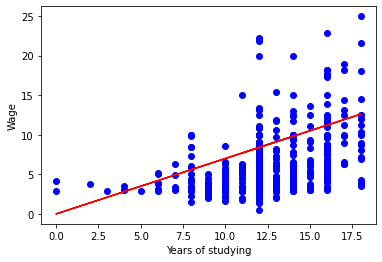

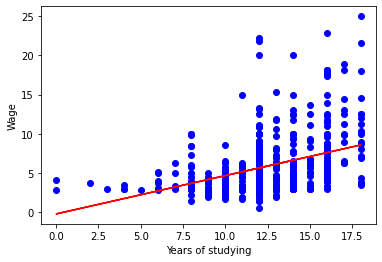

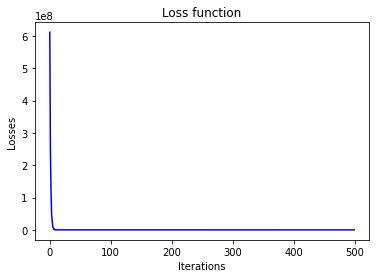

In [25]:
regression = linear_reg(X, Y, learning_rate)

  
Y_pred = regression.predict()
regression.plot()


for i in range(repeat_num):
    Y_pred = regression.predict()
    cost = regression.get_cost_func()
    costs.append(cost)
    regression.update_coeffs()


regression.plot()
print(f'R-squared: {regression.get_current_accuracy()}')
print(f'Regression coefficients: {regression.betas}')

h = plt.figure('Verification')
plt.title('Loss function')
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.plot(range(repeat_num), costs, color='b')
